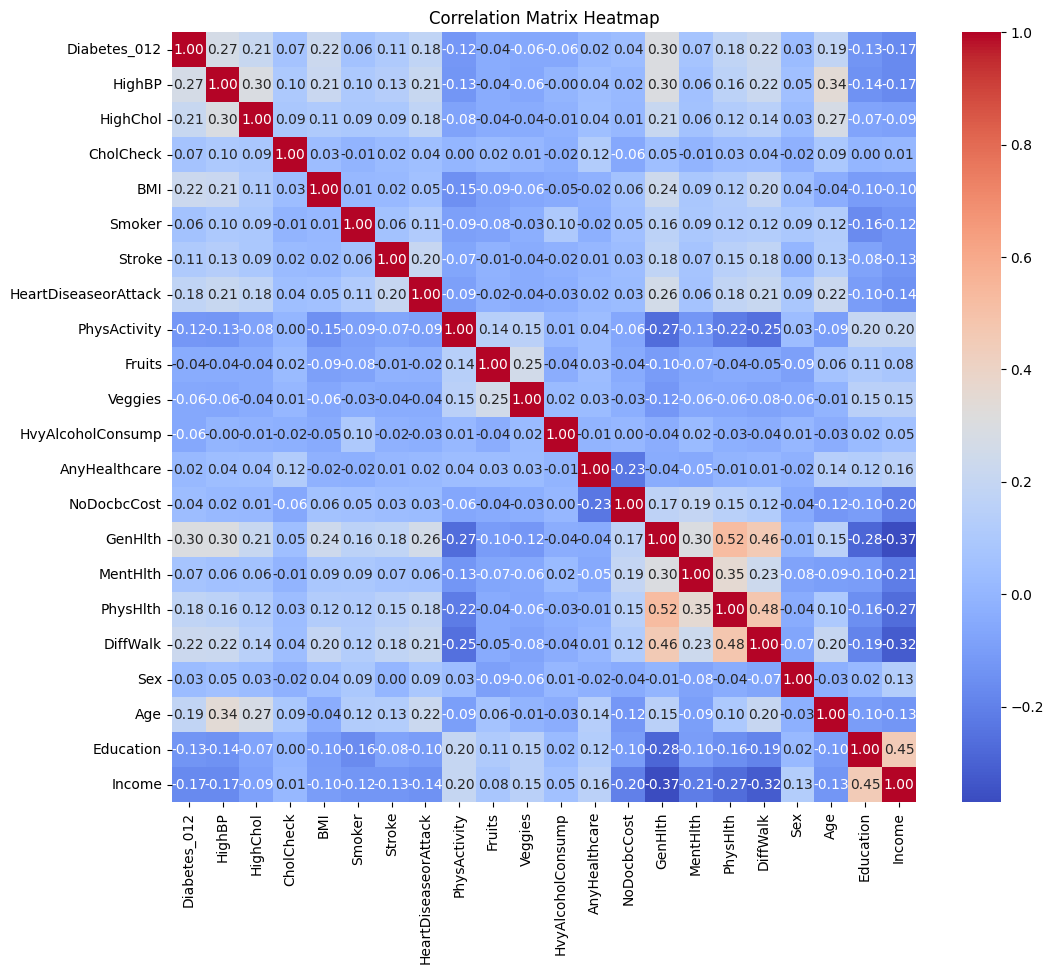

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'

# Read CSV
df = pd.read_csv(url)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Optional: Make plot bigger for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



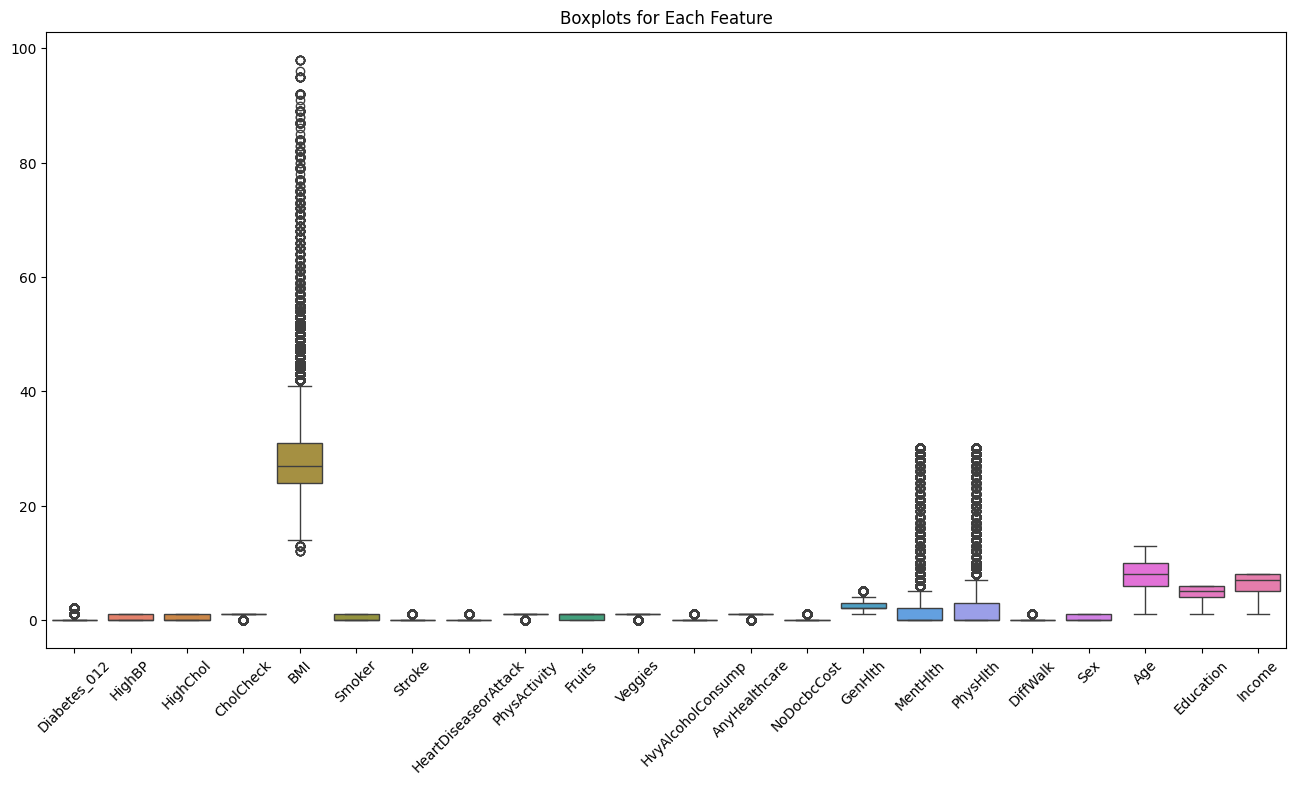

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct downloadable link
url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'

# Read CSV
df = pd.read_csv(url)

# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()


In [ ]:
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ2 (Median):\n", Q2)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['Diabetes_012', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Q1:
 Diabetes_012     0.0
BMI             24.0
GenHlth          2.0
MentHlth         0.0
PhysHlth         0.0
Age              6.0
Education        4.0
Income           5.0
Name: 0.25, dtype: float64

Q2 (Median):
 Diabetes_012     0.0
BMI             27.0
GenHlth          2.0
MentHlth         0.0
PhysHlth         0.0
Age              8.0
Education        5.0
Income           7.0
Name: 0.5, dtype: float64

Q3:
 Diabetes_012     0.0
BMI             31.0
GenHlth          3.0
MentHlth         2.0
PhysHlth         3.0
Age             10.0
Education        6.0
Income           8.0
Name: 0.75, dtype: float64

IQR:
 Diabetes_012    0.0
BMI             7.0
GenHlth         1.0
MentHlth

In [ ]:
# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature (after removing outliers for continuous features)')
plt.show()

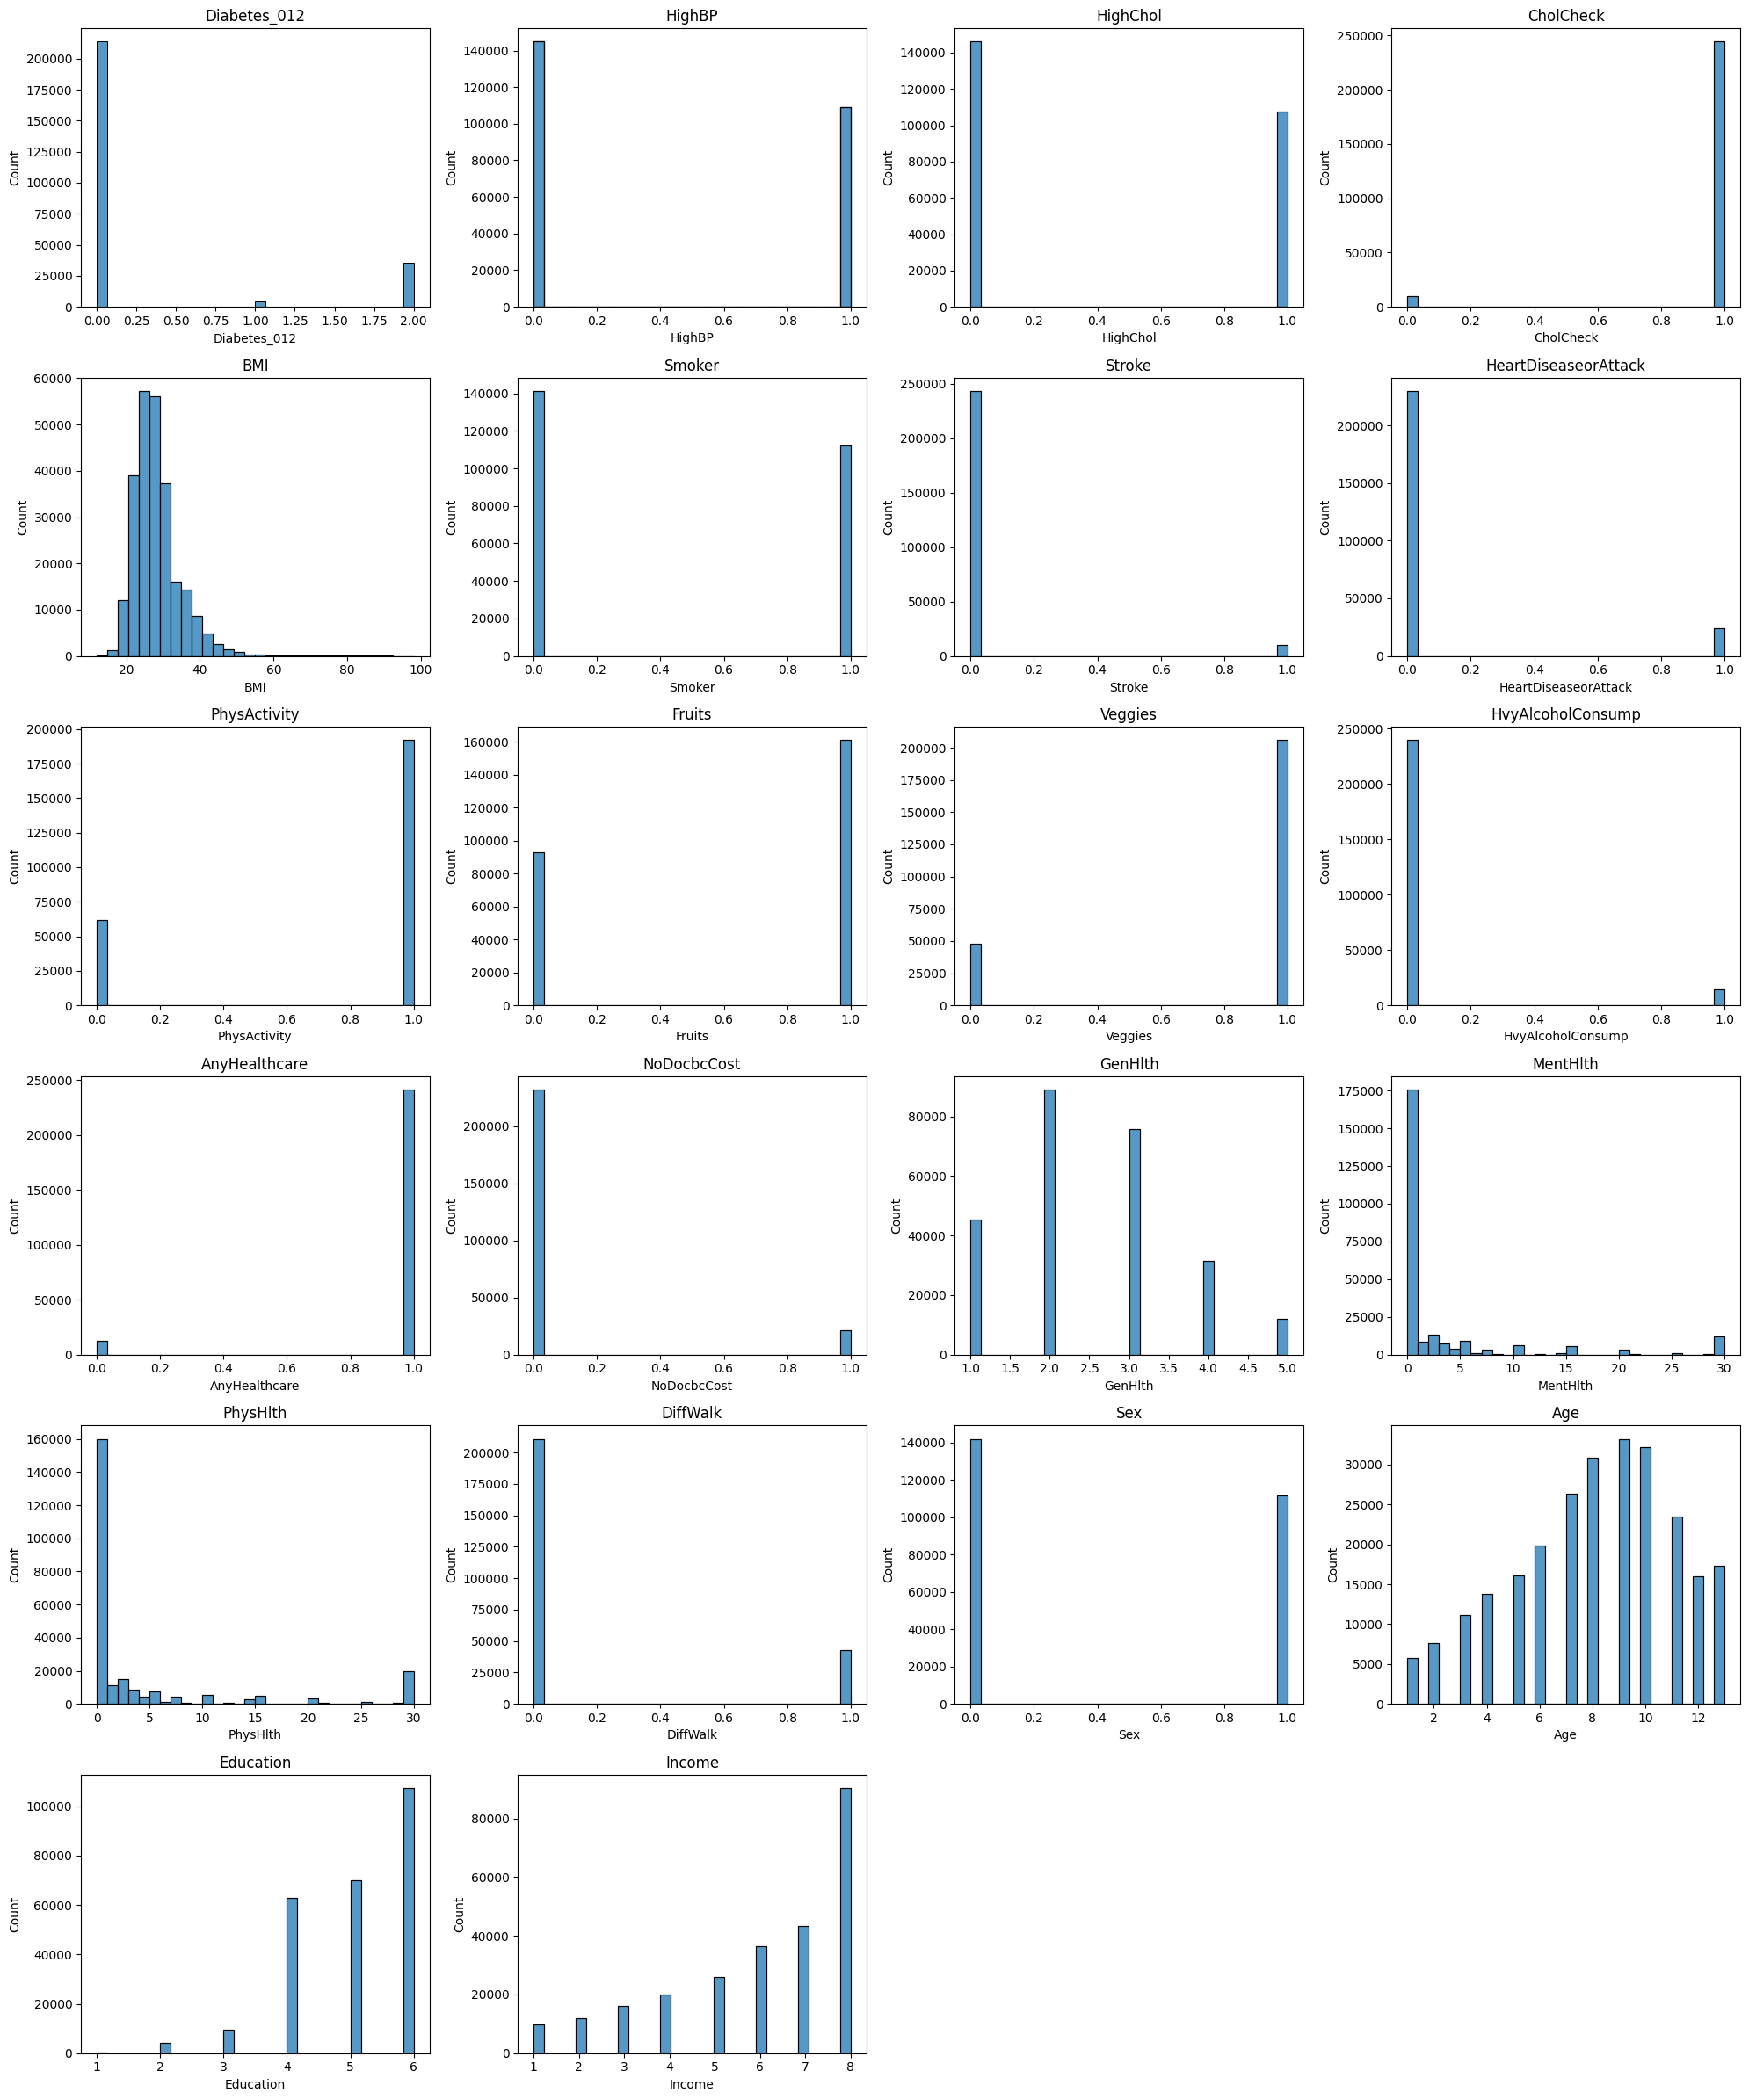

In [ ]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    plt.tight_layout()

plt.show()


100%|██████████| 22/22 [00:04<00:00,  4.53it/s]


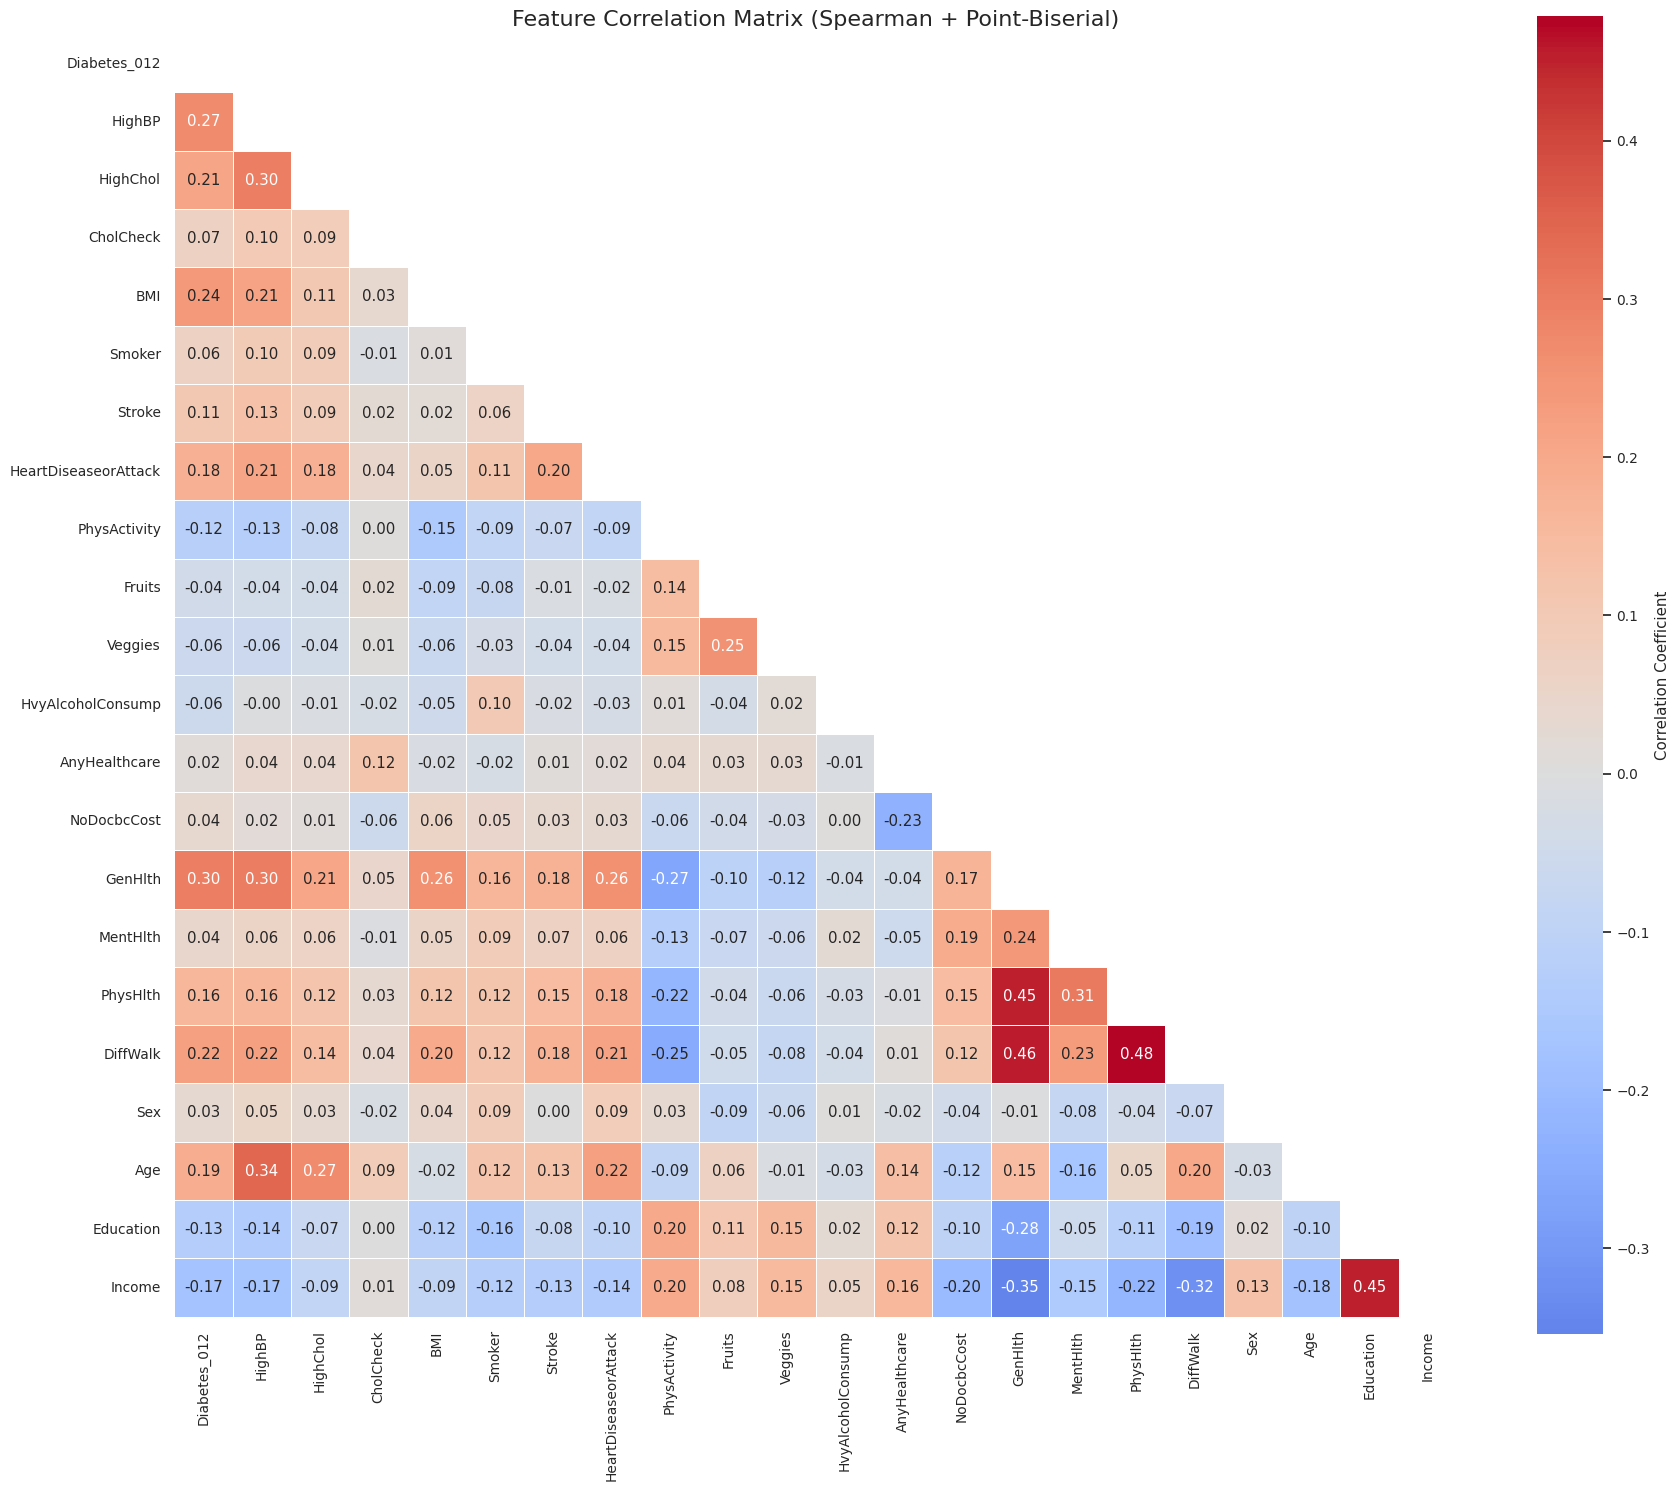


Top correlations with Diabetes_012:
Diabetes_012            1.000000
GenHlth                 0.297138
HighBP                  0.271596
BMI                     0.235887
DiffWalk                0.224239
HighChol                0.209085
Age                     0.186357
HeartDiseaseorAttack    0.180272
Income                 -0.172611
PhysHlth                0.161718
Name: Diabetes_012, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr, spearmanr
from tqdm import tqdm

# Load dataset
url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'
df = pd.read_csv(url)

# Detect binary columns
is_binary = {col: df[col].nunique() == 2 for col in df.columns}

# Initialize correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

# Compute correlations (lower triangle only)
for i, col1 in enumerate(tqdm(df.columns)):
    for j, col2 in enumerate(df.columns[:i+1]):
        x = df[col1]
        y = df[col2]

        if col1 == col2:
            corr = 1.0
        else:
            try:
                if is_binary[col1] and is_binary[col2]:
                    corr = pearsonr(x, y)[0]  # Phi coefficient
                elif is_binary[col1]:
                    corr = pointbiserialr(y, x)[0]  # y must be continuous
                elif is_binary[col2]:
                    corr = pointbiserialr(x, y)[0]
                else:
                    corr = spearmanr(x, y)[0]  # Use Spearman for non-linear
            except:
                corr = np.nan

        # Fill symmetric entries
        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr

# Plotting
plt.figure(figsize=(18, 15))
sns.set(style="white", font_scale=0.9)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
    mask=mask
)

plt.title("Feature Correlation Matrix (Spearman + Point-Biserial)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Target variable correlations
if 'Diabetes_012' in df.columns:
    target_corr = corr_matrix['Diabetes_012'].sort_values(key=abs, ascending=False)
    print("\nTop correlations with Diabetes_012:")
    print(target_corr.head(10))

##**Model A: 3 layers with 8 neurons on origianl dataset (outliers & 21 features)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'# original dataset
# Read CSV
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

# Encode target labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8264 - loss: 0.5868 - val_accuracy: 0.8410 - val_loss: 0.4092
Epoch 2/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8423 - loss: 0.4030 - val_accuracy: 0.8417 - val_loss: 0.4043
Epoch 3/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.4006 - val_accuracy: 0.8450 - val_loss: 0.4019
Epoch 4/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8466 - loss: 0.3983 - val_accuracy: 0.8474 - val_loss: 0.4002
Epoch 5/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8489 - loss: 0.3964 - val_accuracy: 0.8483 - val_loss: 0.3991
Epoch 6/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8481 - loss: 0.3975 - val_accuracy: 0.8482 - val_loss: 0.3997
Epoch 7/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8480 - loss: 0.3981 - val_accuracy: 0.8474 - val_loss: 0.3984
Epoch 8/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8488 - loss: 0.3957 - val_accurac

##**Model B: 3 layers with 8 neurons on cleaned dataset (21 features)**
###**Hyperparameters**
- dataset: remove outliers, but **no feature selecton** applied
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**categorical crossentropy**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 8


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8808 - loss: 0.4713 - val_accuracy: 0.8763 - val_loss: 0.3592
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8823 - loss: 0.3459 - val_accuracy: 0.8763 - val_loss: 0.3514
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8813 - loss: 0.3421 - val_accuracy: 0.8763 - val_loss: 0.3497
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8823 - loss: 0.3376 - val_accuracy: 0.8763 - val_loss: 0.3487
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3396 - val_accuracy: 0.8763 - val_loss: 0.3482
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8820 - loss: 0.3352 - val_accuracy: 0.8763 - val_loss: 0.3475
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8824 - loss: 0.3341 - val_accuracy: 0.8763 - val_loss: 0.3474
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8815 - loss: 0.3362 - val_accuracy: 0.8763 - val_

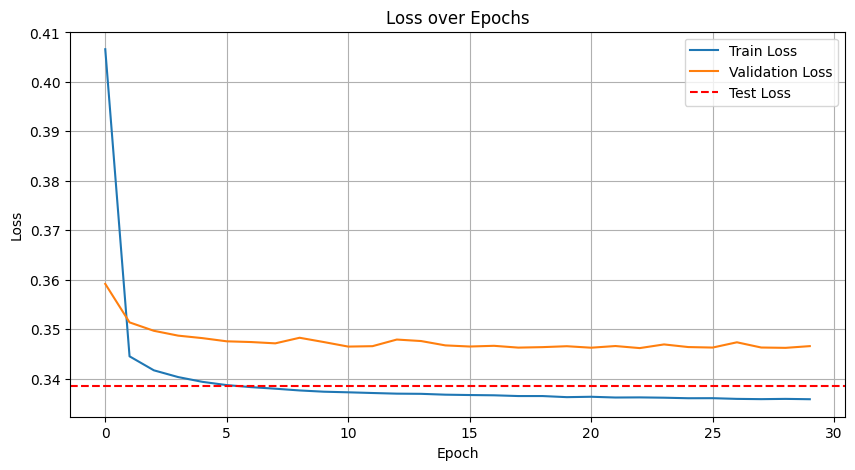

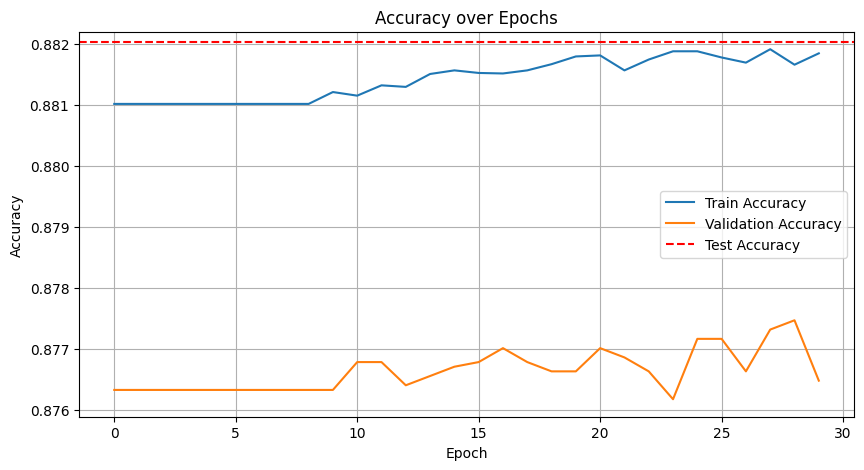

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1PQrL_ergL1pm6zcghtIzoK7L3eLZ-dJ3'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

# Encode target labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
print (test_loss)
print ('---------')
print (test_acc)

0.3412292003631592
------------------------------------------------------------------------------------------
0.881784200668335


##**Model C: 3 layers with 8 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**MSE**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 8


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7963 - loss: 0.1107 - val_accuracy: 0.8763 - val_loss: 0.0700
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8809 - loss: 0.0659 - val_accuracy: 0.8763 - val_loss: 0.0644
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8815 - loss: 0.0620 - val_accuracy: 0.8763 - val_loss: 0.0640
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8810 - loss: 0.0618 - val_accuracy: 0.8763 - val_loss: 0.0640
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8817 - loss: 0.0617 - val_accuracy: 0.8763 - val_loss: 0.0637
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8808 - loss: 0.0617 - val_accuracy: 0.8763 - val_loss: 0.0636
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8803 - loss: 0.0618 - val_accuracy: 0.8763 - val_loss: 0.0636
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8813 - loss: 0.0615 - val_accuracy: 0.8763 - val_

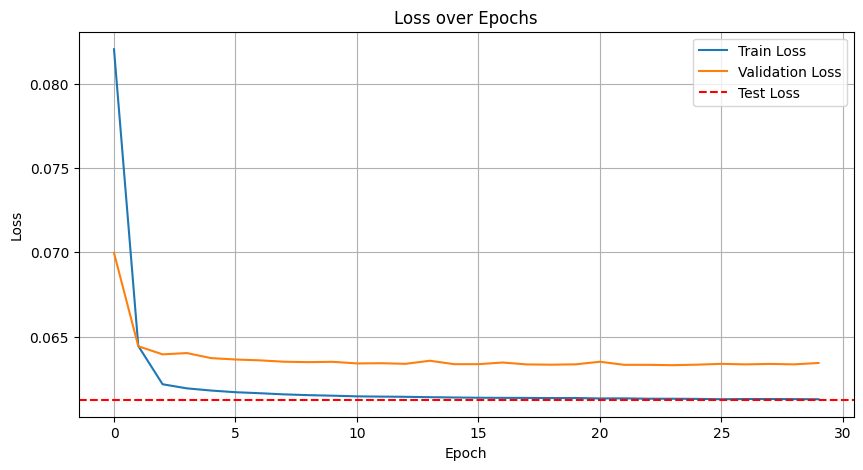

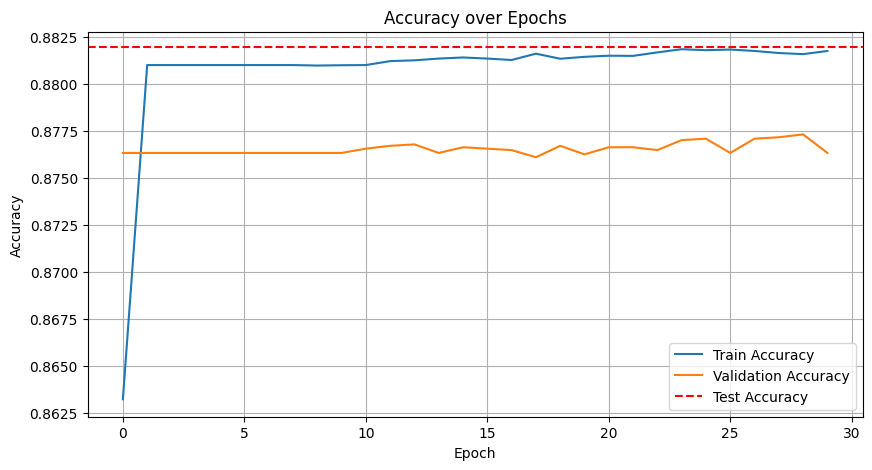

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
print (test_loss)
print ('---------')
print (test_acc)

0.3410887122154236
---------
0.8821794390678406


##**Model D: 3 layers with 8 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**categorical crossentropy**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 8


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8024 - loss: 0.5513 - val_accuracy: 0.8763 - val_loss: 0.3834
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8808 - loss: 0.3639 - val_accuracy: 0.8763 - val_loss: 0.3566
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8811 - loss: 0.3484 - val_accuracy: 0.8763 - val_loss: 0.3530
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8791 - loss: 0.3496 - val_accuracy: 0.8763 - val_loss: 0.3515
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3429 - val_accuracy: 0.8763 - val_loss: 0.3503
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8809 - loss: 0.3395 - val_accuracy: 0.8763 - val_loss: 0.3499
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3429 - val_accuracy: 0.8763 - val_loss: 0.3492
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8804 - loss: 0.3415 - val_accuracy: 0.8763 - val_

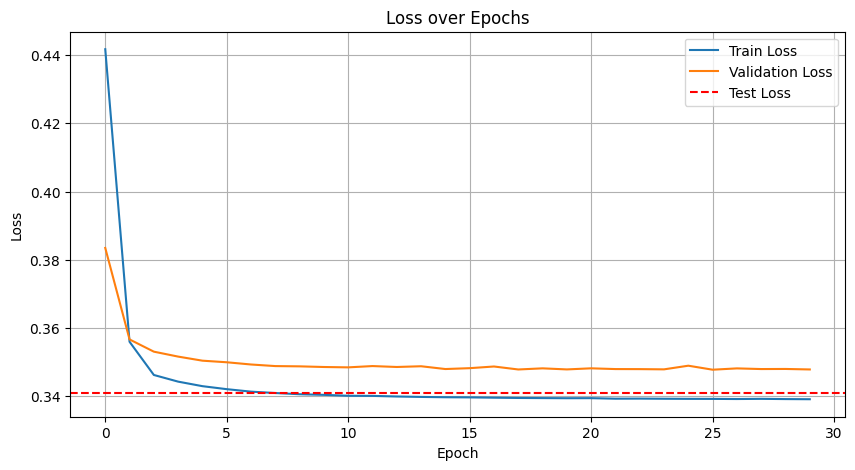

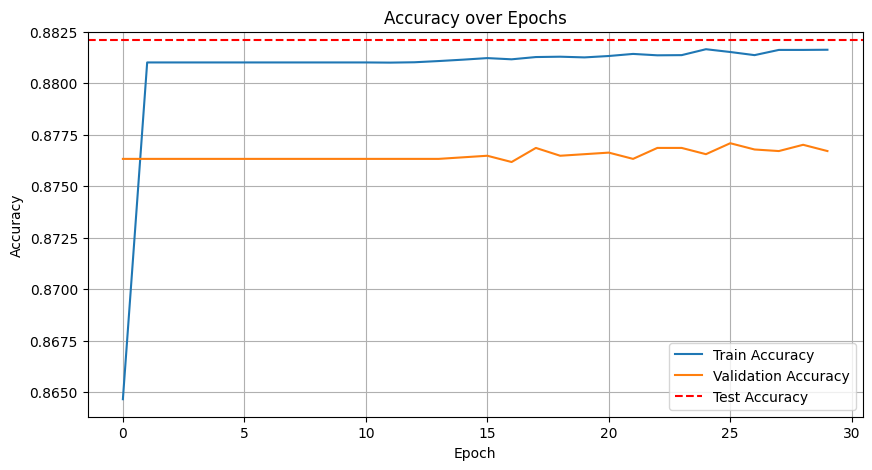

0.3409290909767151
---------
0.8821186423301697


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


##**Model E: 3 layers with 16 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**categorical crossentropy**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8707 - loss: 0.4625 - val_accuracy: 0.8763 - val_loss: 0.3544
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8814 - loss: 0.3433 - val_accuracy: 0.8763 - val_loss: 0.3512
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8807 - loss: 0.3434 - val_accuracy: 0.8763 - val_loss: 0.3496
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8817 - loss: 0.3403 - val_accuracy: 0.8763 - val_loss: 0.3492
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3408 - val_accuracy: 0.8763 - val_loss: 0.3487
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8818 - loss: 0.3400 - val_accuracy: 0.8763 - val_loss: 0.3486
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8810 - loss: 0.3418 - val_accuracy: 0.8763 - val_loss: 0.3482
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8835 - loss: 0.3353 - val_accuracy: 0.8763 - val

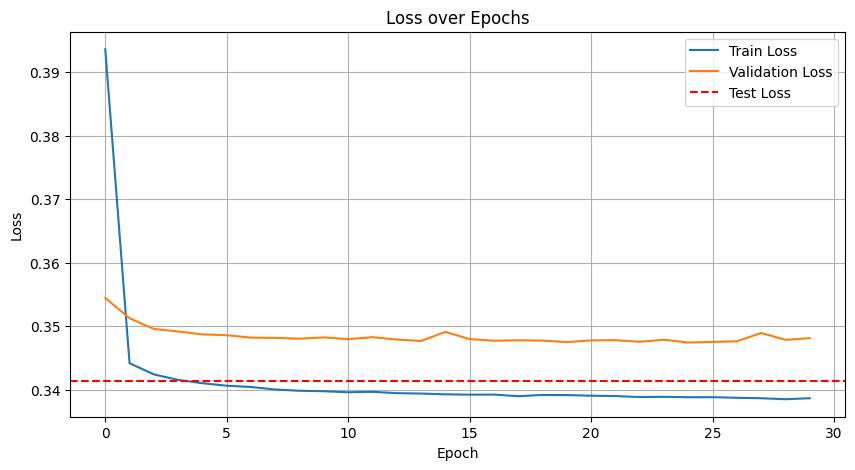

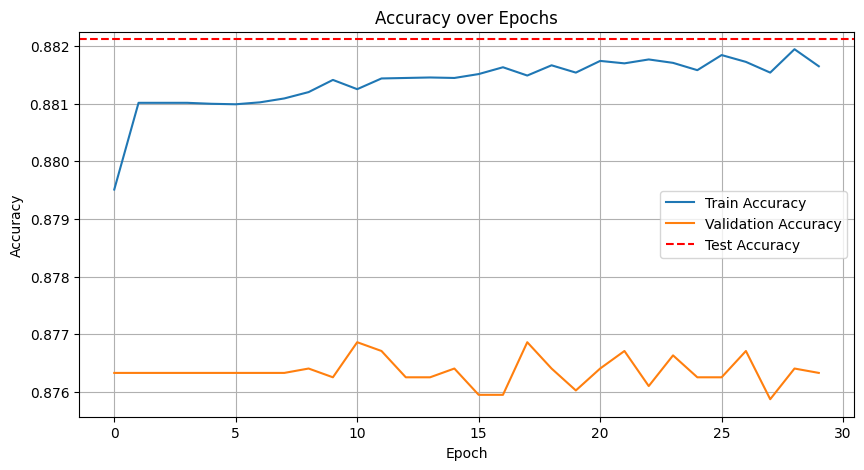

0.3413671553134918
---------
0.8821186423301697


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


##**Model F: 3 layers with 16 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**MSE**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8818 - loss: 0.0886 - val_accuracy: 0.8763 - val_loss: 0.0647
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8817 - loss: 0.0620 - val_accuracy: 0.8763 - val_loss: 0.0638
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8803 - loss: 0.0623 - val_accuracy: 0.8763 - val_loss: 0.0637
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8816 - loss: 0.0617 - val_accuracy: 0.8763 - val_loss: 0.0635
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8806 - loss: 0.0615 - val_accuracy: 0.8763 - val_loss: 0.0636
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8807 - loss: 0.0611 - val_accuracy: 0.8761 - val_loss: 0.0634
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8825 - loss: 0.0610 - val_accuracy: 0.8762 - val_loss: 0.0635
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8806 - loss: 0.0620 - val_accuracy: 0.

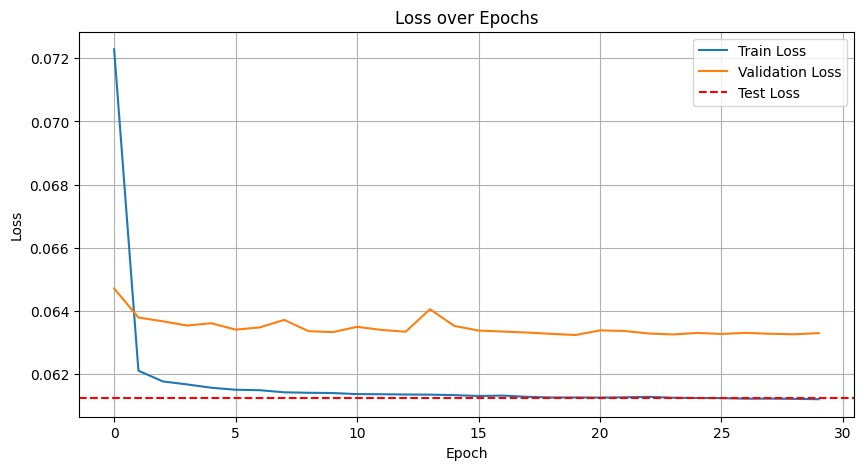

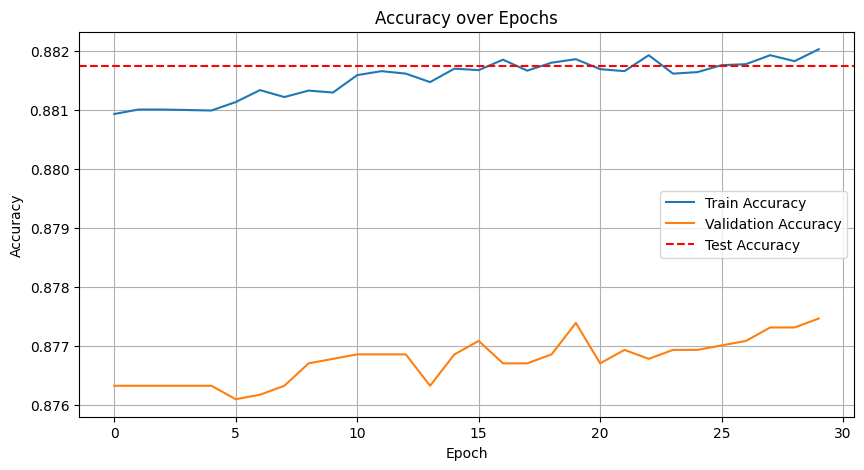

0.06125742569565773
---------
0.8817538022994995


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


##**Model G: 3 layers with 16 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 64
- loss function:**ce**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1850/1850 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8814 - loss: 0.3941 - val_accuracy: 0.8763 - val_loss: 0.3518
Epoch 2/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8820 - loss: 0.3401 - val_accuracy: 0.8763 - val_loss: 0.3497
Epoch 3/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8814 - loss: 0.3403 - val_accuracy: 0.8763 - val_loss: 0.3489
Epoch 4/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8811 - loss: 0.3406 - val_accuracy: 0.8765 - val_loss: 0.3487
Epoch 5/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8808 - loss: 0.3423 - val_accuracy: 0.8768 - val_loss: 0.3484
Epoch 6/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8816 - loss: 0.3412 - val_accuracy: 0.8763 - val_loss: 0.3486
Epoch 7/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3418 - val_accuracy: 0.8763 - val_loss: 0.3497
Epoch 8/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8810 - loss: 0.3393 - val_accurac

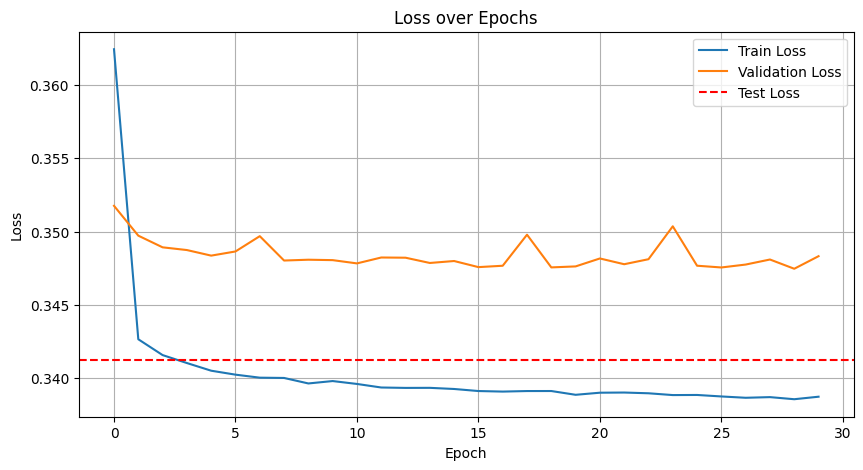

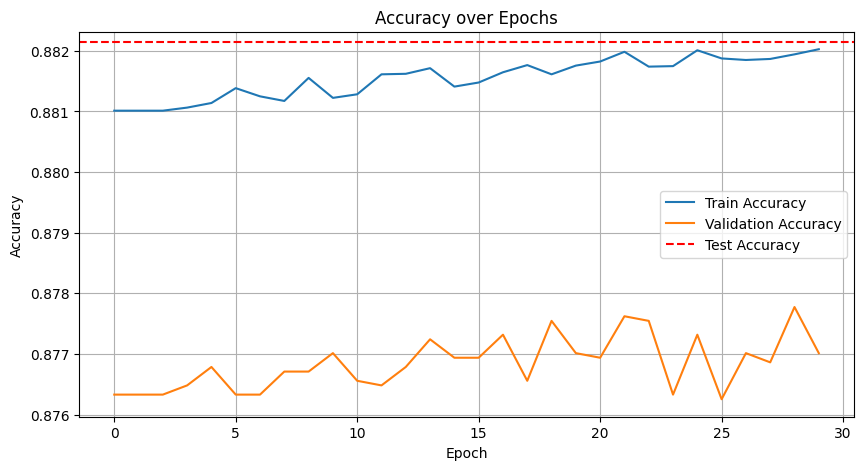

0.34125012159347534
---------
0.8821490406990051


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)
